BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not. Problem Statement: Business Use Case There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

You are provided with following 2 files:

train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

Dataset Attributes Here is the description of all the variables :

Variable: Definition ID: Unique client ID age: Age of the client job: Type of job marital: Marital status of the client education: Education level default: Credit in default. housing: Housing loan loan: Personal loan contact: Type of communication month: Contact month day_of_week: Day of week of contact duration: Contact duration campaign: number of contacts performed during this campaign to the client pdays: number of days that passed by after the client was last contacted previous: number of contacts performed before this campaign poutcome: outcome of the previous marketing campaign

Output variable (desired target): Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn import metrics
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df1=pd.read_csv("termdeposit_test.csv")
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


## EDV

In [4]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [6]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# checking for empty spaces
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().any()

False

In [10]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

## Visualisation

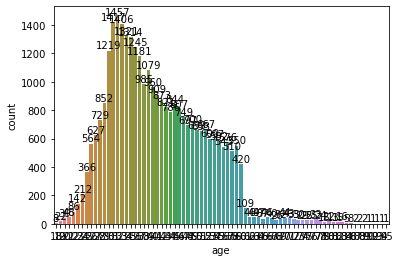

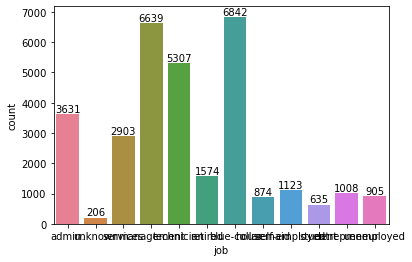

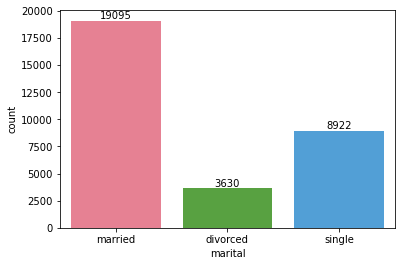

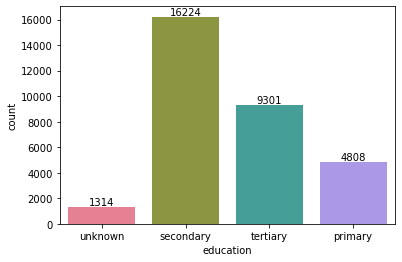

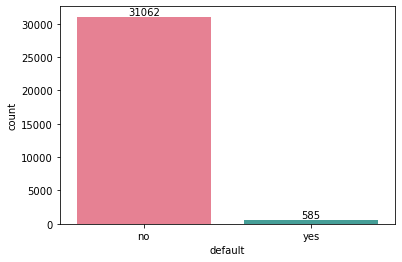

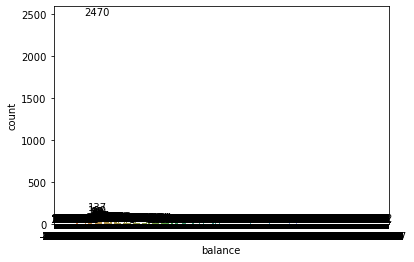

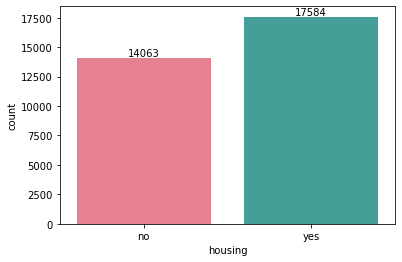

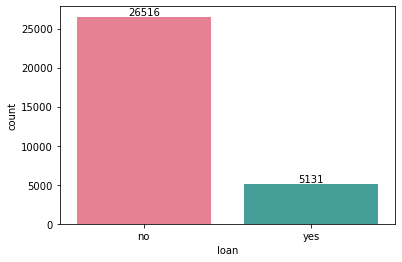

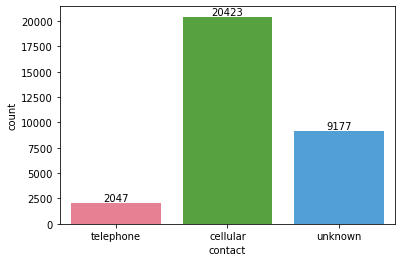

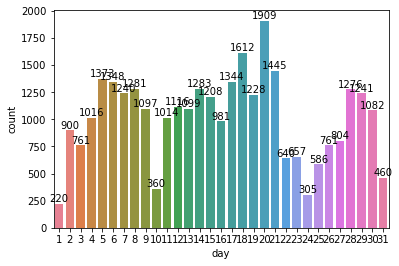

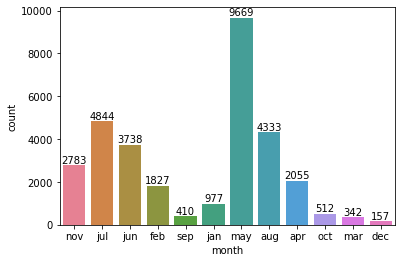

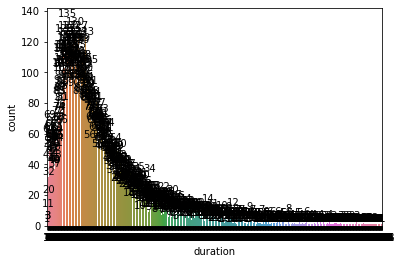

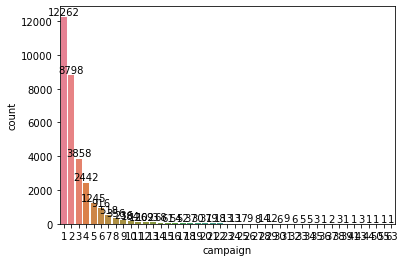

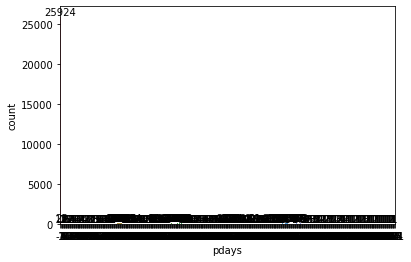

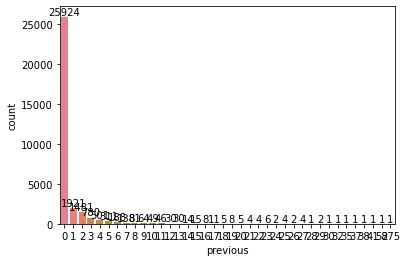

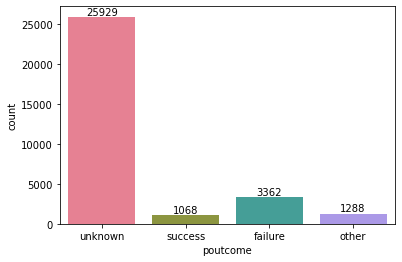

In [11]:
for i in df.columns[1:-1]:
    plt.figure(i)
    ax= sns.countplot(x=i,data=df,palette="husl")
    plt.bar_label(ax.containers[0])
    plt.show()
    #print(dfmode[i].value_counts().to_frame().T)

<Figure size 576x576 with 0 Axes>

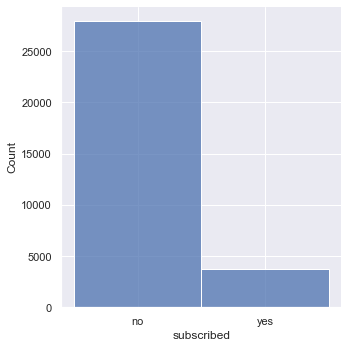

In [12]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(df['subscribed'])
plt.show()

We can see that many people have not subscribed

In [28]:
df_n = df.drop('ID',axis=1)

In [29]:
df_n

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [31]:
le= LabelEncoder()
for col in df_n:
    df[col]= le.fit_transform(df[col])
    
df_n

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


<AxesSubplot:>

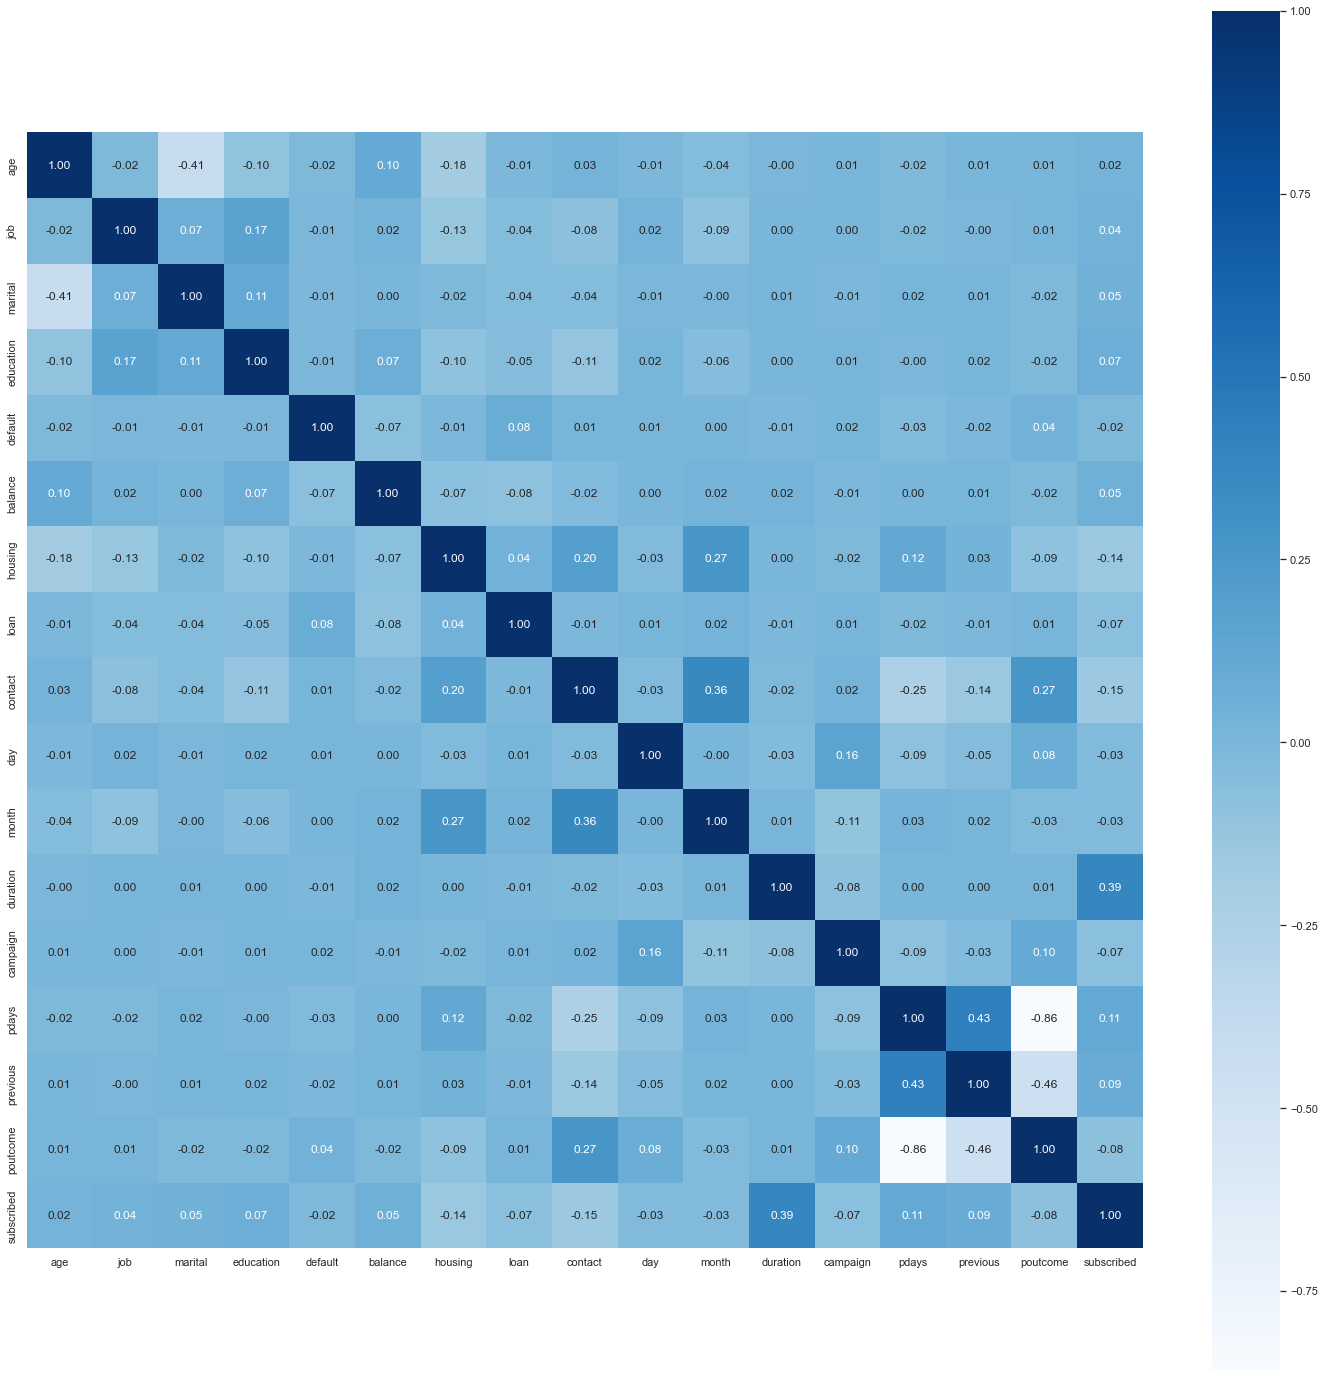

In [32]:
# To find multicolinearity

correlation=df_n.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':12},cmap="Blues")

### Removing Outliers

In [39]:
z=np.abs(zscore(df_n))
dfnw=df_n[(z<3).all(axis=1)]
dfnw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [34]:
df_n

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [41]:
#Checking skewness
dfnw.skew()

age           0.439159
job           0.258302
marital      -0.095968
education     0.197092
default       0.000000
balance       2.433928
housing      -0.207765
loan          1.829242
contact       0.698882
day           0.075854
month        -0.469448
duration      1.596175
campaign      2.064222
pdays         2.799415
previous      3.657231
poutcome     -2.449518
subscribed    2.624756
dtype: float64

In [44]:
# removing skewness

for i in df_n.columns:   
    try:
        if abs(df_n[f"{i}"].skew())>=1:
            print(i)
            dfn[f"{i}"]=np.sqrt(df_n[f"{i}"])
            print(i,"--",df_n[f"{i}"].skew())
    except:
        continue

default
balance
loan
duration
campaign
pdays
previous
poutcome
subscribed


In [45]:
df_n.dropna(inplace=True)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(df_n.values,i) for i in range(df_n.shape[1])]
vif["features"]=df_n.columns
print(vif)

    VIF Factor    features
0    12.567945         age
1     2.834331         job
2     4.724960     marital
3     3.742772   education
4     1.031736     default
5     1.244666     balance
6     2.606441     housing
7     1.215428        loan
8     2.012632     contact
9     4.594410         day
10    5.274563       month
11    2.369780    duration
12    1.881871    campaign
13    3.107630       pdays
14    1.334516    previous
15   18.200375    poutcome
16    1.428861  subscribed


### PCA (Principal component Analysis )

In [52]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

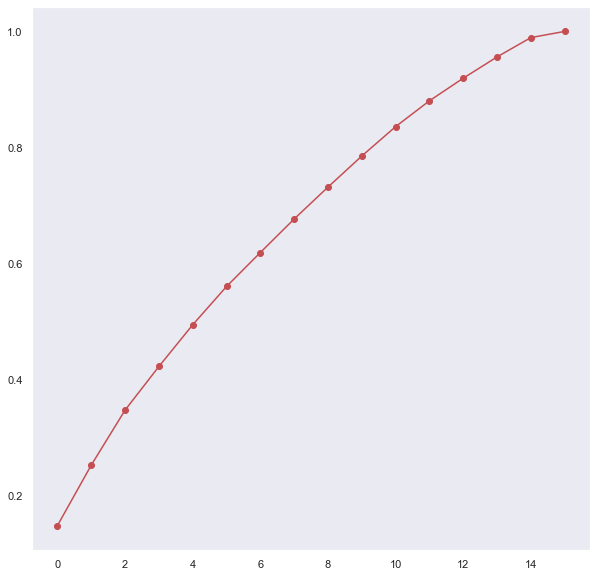

In [53]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [54]:
# PCA with 12 components for our prediction.
pca_new = PCA(n_components=12)
x_new = pca_new.fit_transform(x)
x_new

array([[-0.87157019,  0.08342322,  0.22047509, ..., -1.18178434,
        -2.31458643,  1.38667054],
       [-0.44458059, -0.80526284, -1.47580028, ..., -0.73813028,
         1.09478076, -0.16971349],
       [-0.62315303,  0.42739007, -0.87652034, ..., -0.41994991,
         0.24455094, -1.43478605],
       ...,
       [-0.54957014, -1.75634028, -0.10892282, ...,  1.14992711,
        -0.20683077,  0.77353385],
       [-0.87067702, -1.29756578,  3.02936185, ..., -1.83266638,
         0.92650952,  0.20061408],
       [ 3.33757458,  1.61471666,  0.34694766, ...,  0.17686718,
        -0.57897854, -1.08491369]])

In [57]:
sc = StandardScaler()

from sklearn.feature_selection import SelectKBest, f_classif
xbest = df_n.drop(columns = ['age','month','day'])
scaled_x = sc.fit_transform(xbest)

# Resampling using SMOTE

0    27932
1    27932
Name: subscribed, dtype: int64


<AxesSubplot:xlabel='subscribed', ylabel='count'>

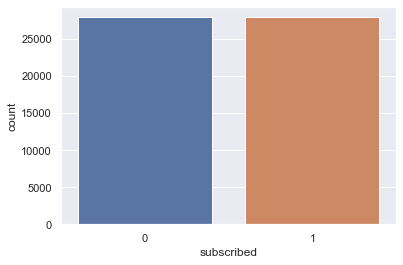

In [47]:
#Oversampling the data
dfy=df_n["subscribed"]
dfx=df_n.drop("subscribed",axis=1)
smt=SMOTE()
trainx, trainy=smt.fit_resample(dfx,dfy)
print(trainy.value_counts())
sns.countplot(trainy)

# Scaling of Independent features

In [48]:
X=trainx
Y=trainy
st=StandardScaler()
x=st.fit_transform(X)
Xf=pd.DataFrame(data=x)

# Machine Learning

# Preparing data for modelling

In [49]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(Xf,Y,test_size=0.2,random_state=15)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(44691, 16) (44691,)
(11173, 16) (11173,)


In [50]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.8566186342074644 
 [[4624  927]
 [ 675 4947]] 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      5551
           1       0.84      0.88      0.86      5622

    accuracy                           0.86     11173
   macro avg       0.86      0.86      0.86     11173
weighted avg       0.86      0.86      0.86     11173
 

Cross Validation Score is : [0.85535295 0.85410606 0.8563437  0.85656746 0.85209219]
Mean Score : 0.8548924736418044


accuracy score for  GaussianNB() is :  0.7433992660878904 
 [[3071 2480]
 [ 387 5235]] 
               precision    recall  f1-score   support

           0       0.89      0.55      0.68      5551
           1       0.68      0.93      0.79      5622

    accuracy                           0.74     11173
   macro avg       0.78      0.74      0.73     11173
weighted avg       0.78      0.74      0.73     11173
 

Cross Validation Score is : [0.735764

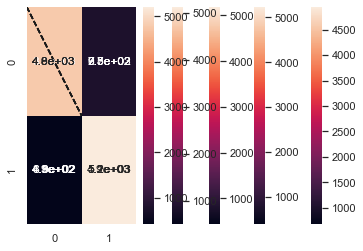

In [59]:
model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")
    fpr,tpr,thresholds=metrics.roc_curve(test_y,predm,pos_label=2)
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr)

# Hyperparameter tuning

In [62]:
rf1=RandomForestClassifier(criterion='entropy', min_samples_split= 2, random_state= 13)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.9288463259643784
Cross Validation Score is : [0.88734758 0.88890132 0.88923697 0.89113896 0.88878944]
Mean Score : 0.8890828519226218


In [65]:
rf=RandomForestClassifier()
ran=[]
for i in range(20):
    ran.append(i)
    
dict2={"random_state":ran,'criterion':['gini', 'entropy', 'log_loss'],"min_samples_split":[1,2,3,4,5,6]}
gv=GridSearchCV(rf,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'gini', 'min_samples_split': 2, 'random_state': 11}

In [66]:
rf=RandomForestClassifier(criterion='gini', min_samples_split= 2, random_state= 0)
rf.fit(train_x,train_y)
prf=rf.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.9283988185805065
Cross Validation Score is : [0.88734758 0.88890132 0.88923697 0.89113896 0.88878944]
Mean Score : 0.8890828519226218
